# Lab 2 (Due @ by 11:59 pm via Canvas/Gradescope)

#! snip: Lab2
# $\color{red}{\text{SOLUTIONS}}$ 
#! snip-end

Due: Tuesday Oct 17 @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file to Gradescope (this can also be done via the assignment on Canvas).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the `ipynb` file to gradescope.

### Group Work

You are encouraged to work in groups for this Lab, however each student should submit their own notebook file to Gradescope. While each Part of the Lab depends on previous parts, talking through the problem with your group should help speed up both understanding and arriving at a solution. 

In [1]:
#! snip: Lab2

!python3 -m snip_copy Lab2_Solutions.ipynb

#! snip-end

snip-copied: Lab2.ipynb


In [2]:
# you might use the below modules on this lab
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Part 1: Understanding Cleaning (25 points)

We wish to create a data frame that includes all the spells for each class (a "class" is something like a "wizard", or a "bard") in Dungeons and Dragons 5th Edition, which you can find [here](http://dnd5e.wikidot.com/). Your final data frame should look something like:

| Class     | Level     | Spell Name    | School      | Casting Time | Range                | Duration      | Components |
|----------:|----------:|--------------:|------------:|-------------:|---------------------:|--------------:|-----------:|
| Artificer | Level 0   | Acid Splash   | Conjuration | 1 Action     | 60 Feet              | Instantaneous | V, S       |
| Artificer | Level 0   | Booming Blade | Evocation   | 1 Action     | Self (5-foot radius) | 1 Round       | S, M       |
| ...       | ...       | ...           | ...         | ...          | ...                  | ...           | ...        |
| Wizard    | Level 9   | Wish          | Conjuration | 1 Action     | Self                 | Instantaneous | V          |

Below are two functions which:
- takes a class (string) as an argument and returns the tables from the class's DND wiki spell page in a dictionary for each spell level
- takes a list of classes, applies the first function to each of them, then combines all the tables into a data frame, including a column with class name and a column with spell level

**DO NOT CHANGE ANYTHING IN THE BODY OF THE FUNCTIONS.**

**In a markdown cell** create a bullet point list where you explain each what each chunk of code does. Your bullet point list should have **FIVE** bullet points/explanations corresponding to the four chunks below the `# EXPLAIN THIS (number)` comments. You must accurately summarize the content and procedure of each code chunk. **Talking to your neighbors/group about this is highly recommended.**

In [3]:
def get_class_spell_dict(dnd_class):
    """ takes a D&D class (string) and gets the spell tables and saves them in a dictionary
    
    Args:
        dnd_class (str): the D&D class
        
    Returns:
        table_dict (dict): a dictionary of tables, one for each spell level
    """

    # EXPLAIN THIS (1)
    url = f'http://dnd5e.wikidot.com/spells:{dnd_class}'
    tables = pd.read_html(url)
    table_dict = {}
    for i in range(len(tables)):
        table_dict[f'Level {i}'] = tables[i]

    return table_dict

def get_full_spell_df(class_list):
    """ takes a list of D&D classes (list of strings), applies the get_class_spell_dict() function to them, and then combines them into a data frame

    Args:
        class_list (list): a list of strings

    Returns:
        spells_df (data frame): a data frame with all the spells
    """

    spells_df = pd.DataFrame()
    level_list = []
    long_class_list = []
    
    # EXPLAIN THIS (2)
    for class_ in class_list:
        class_dict = get_class_spell_dict(class_)
        class_df = pd.DataFrame()

        # EXPLAIN THIS (3)
        for level in class_dict:
            level_list.append([level] * len(class_dict[level]))
            class_df = pd.concat([class_df, class_dict[level]])

        # EXPLAIN THIS (4)
        long_class_list.append([class_] * len(class_df))
        spells_df = pd.concat([spells_df, class_df])

    # EXPLAIN THIS (5)
    spells_df.insert(0, 'Level', [item for sublist in level_list for item in sublist])
    spells_df.insert(0, 'Class', [item for sublist in long_class_list for item in sublist])
    
    return spells_df

class_list = ['Artificer', 'Bard', 'Cleric', 'Druid', 'Paladin', 'Ranger', 'Sorcerer', 'Warlock', 'Wizard']
notclean_df = get_full_spell_df(class_list)
notclean_df

,Class,Level,Spell Name,School,Casting Time,Range,Duration,Components
0,Artificer,Level 0,Acid Splash,Conjuration,1 Action,60 Feet,Instantaneous,"V, S"
1,Artificer,Level 0,Booming Blade,Evocation,1 Action,Self (5-foot radius),1 round,"S, M"
2,Artificer,Level 0,Create Bonfire,Conjuration,1 Action,60 Feet,"Concentration, up to 1 minute","V, S"
3,Artificer,Level 0,Dancing Lights,Evocation,1 Action,120 feet,Concentration up to 1 minute,"V, S, M"
4,Artificer,Level 0,Fire Bolt,Evocation,1 Action,120 feet,Instantaneous,"V, S"
...,...,...,...,...,...,...,...,...
13,Wizard,Level 9,Time Ravage,Necromancy DC,1 Action,90 feet,Instantaneous,"V, S, M"
14,Wizard,Level 9,Time Stop,Transmutation,1 Action,Self,Instantaneous,V
15,Wizard,Level 9,True Polymorph,Transmutation,1 Action,30 feet,"Concentration, up to 1 hour","V, S, M"
16,Wizard,Level 9,Weird,Illusion,1 Action,120 feet,"Concentration, up to 1 minute","V, S"


#! snip: Lab2

Your answers here:

- The first function does the webscraping via `pd.read_html` for the given class, then puts each table corresponding to a spell level in it's own key-value pair in a dictionary which is returned.
- This part of the second function loops through all the classes in the class list and calls the first function on each in turn, then initializes a temporary, empty class data frame.
- This part loops through the keys in the dictionary and fills the class data frame sequentially, while keeping track of the level of each spell.
- This part keeps track of the class for each spell and adds the class to the empty spells data frame that was initialized at the beginning of the function.
- This parts inserts the two lists (for levels and classes) into the data frame sequentially in the first position so that the final data frame looks how we like it.

#! snip-end

Your answers here:

-
-
-
-
-

# Part 2: Summarizing and Visualizing Data

This problem uses `evdataset.csv`, available in the Labs Module on Canvas, which was taken and adapted from Kaggle (no longer hosted) and contains a sample of 194 electric vehicles on the market until 2022. The full dataset includes basic technical specifications, battery capacity and range in various weather and road conditions.

In [4]:
df_ev = pd.read_csv('evdataset.csv', index_col='id')
df_ev.head()

,drive,acceleration,topspeed,electricrange,totalpower,totaltorque,batterycapacity,chargespeed,length,width,height,wheelbase,grossweight
id,,,,,,,,,,,,,
1647,Rear,7.8,185,390,168,350,77.4,49,4515,1890,1580,2900,2495
1493,AWD,6.2,160,330,215,520,69.7,46,4684,1834,1701,2829,2580
1229,AWD,3.2,260,415,500,850,93.4,46,4963,1966,1381,2900,2880
1252,Rear,5.7,190,470,250,430,83.9,54,4783,1852,1448,2856,2605
1534,Rear,7.9,160,450,150,310,82.0,55,4261,1809,1568,2771,2300


## Part 2.1: Numeric Summaries (25 points)

On your own or with a classmate, discuss which features you think would be most interesting to compare across different drives. Pick two or three of them and, after using `.groupby()` to group by the `drive` feature, calculate for all of them:

- means
- medians
- standard deviations

Then, using the original data set, look at the pairwise correlations (with the correlation matrix, check out the [`pd.corr()` documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)). Finally, **in a markdown cell** discuss your key takeaways from the numeric summaries you calculated, and what the correlations were between your chosen features. Where they among the strongest/weakest relationships? Do you think the type of drive may impact these relationships? Any other interesting results of note?


In [5]:
#! snip: Lab2

df_ev_gbreg = df_ev.groupby('drive')

#! snip-end

In [22]:
#! snip: Lab2

feats = ['topspeed', 'batterycapacity', 'grossweight']
df_ev_gbreg[feats].mean()

#! snip-end

,topspeed,batterycapacity,grossweight
drive,,,
AWD,209.813333,88.268000,2814.320000
Front,143.630137,58.695890,2519.356164
Rear,176.521739,75.273913,2518.304348


In [24]:
#! snip: Lab2

df_ev_gbreg[feats].median()

#! snip-end

,topspeed,batterycapacity,grossweight
drive,,,
AWD,205.0,84.0,2845.0
Front,135.0,51.1,2470.0
Rear,160.0,79.2,2509.5


In [25]:
#! snip: Lab2

df_ev_gbreg[feats].std()

#! snip-end

,topspeed,batterycapacity,grossweight
drive,,,
AWD,31.569611,13.567939,253.929718
Front,15.394359,15.290869,539.019773
Rear,24.695244,18.410823,284.022133


In [15]:
#! snip: Lab2

df_ev.corr(numeric_only = True)

#! snip-end

,acceleration,topspeed,electricrange,totalpower,totaltorque,batterycapacity,chargespeed,length,width,height,wheelbase,grossweight
acceleration,1.000000,-0.872495,-0.708172,-0.836703,-0.784717,-0.568002,-0.405163,0.009513,-0.220777,0.738645,0.239264,-0.054268
topspeed,-0.872495,1.000000,0.706707,0.922050,0.829415,0.664636,0.284501,0.244581,0.440627,-0.676073,-0.006390,0.251085
electricrange,-0.708172,0.706707,1.000000,0.637401,0.614073,0.863062,0.415019,0.219826,0.277975,-0.540106,0.061227,0.269258
totalpower,-0.836703,0.922050,0.637401,1.000000,0.905929,0.698567,0.184997,0.346570,0.526707,-0.533154,0.114506,0.394406
totaltorque,-0.784717,0.829415,0.614073,0.905929,1.000000,0.713692,0.132464,0.347060,0.496185,-0.422316,0.169585,0.433598
batterycapacity,-0.568002,0.664636,0.863062,0.698567,0.713692,1.000000,0.100640,0.564253,0.610476,-0.215981,0.422128,0.656627
chargespeed,-0.405163,0.284501,0.415019,0.184997,0.132464,0.100640,1.000000,-0.409204,-0.327037,-0.566495,-0.450205,-0.353369
length,0.009513,0.244581,0.219826,0.346570,0.347060,0.564253,-0.409204,1.000000,0.859018,0.367423,0.900007,0.907587
width,-0.220777,0.440627,0.277975,0.526707,0.496185,0.610476,-0.327037,0.859018,1.000000,0.212197,0.734512,0.853959
height,0.738645,-0.676073,-0.540106,-0.533154,-0.422316,-0.215981,-0.566495,0.367423,0.212197,1.000000,0.576104,0.391405


#! snip: Lab2

My three chosen features were Top Speed, Battery Capacity, and Gross Weight. All three were larger in value (both by mean and median) for AWD vehicles than for Front or Rear drive vehicles. All Top Speed mean values were larger than their median values, suggesting that Top Speed is a right skewed feature. Interestingly, the Gross Weight of AWD vehicles seems left skewed, while for Front drive vehicles it seems right skewed. Each of the different types of drives was more variable in each of my chosen features: AWD vehicles had the largest Top Speed standard deviation, Front drive vehicles had the largest Gross Weight standard deviation, and Rear drive vehicles the largest Battery Capacity standard deviation. The largest correlation in the data set is between Top Speed and Total Power, which is unsurprising, though all three of my chosen features were positively correlated. Most of the negative correlations in the data set appear with acceleration (and a few others with chargespeed and height).

#! snip-end

## Part 2.2: Visual Summaries (25 points)

Again choose two or three features (they can be the same or different as those from the previous part) and make a few plots to further your understanding of the data. For the first two plots, you may use any of `matplotlib`, `seaborn` or `plotly` (you may find some easier to use than others). Please make:

- Histograms for each drive type (i.e. three histograms, one for each of: AWD, Front, Rear) for one of your chosen features. You may make them separately or within a subplot.
- A scatterplot of two of your features, with points colored by drive type.
- Check out the [seaborn plot options again](https://seaborn.pydata.org/examples/index.html) and pick one to use with your chosen features (exercise some thought as to what you are hoping the plot will communicate; you may find it worthwhile to discuss options with your classmates).

Then, **in a markdown cell** discuss what you learned from the plots you created. If you used the same features that you investigated numerically, did the plots corroborate your findings? Or did they provide new insight? If you used new features, what do the plots tell you about what the numeric reationship(s) between the features might be? Ay other interesting results to note?

In [16]:
#! snip: Lab2

print(df_ev.topspeed.min())
print(df_ev.topspeed.max())

#! snip-end

125
261


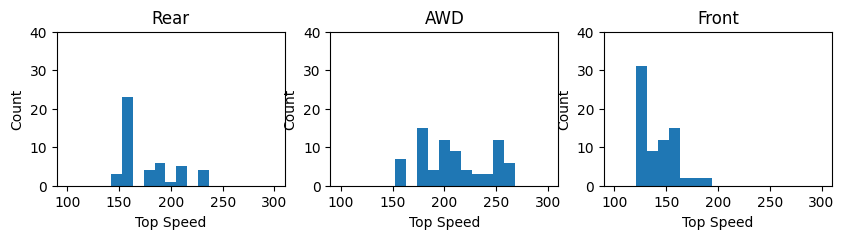

In [17]:
#! snip: Lab2

bins = np.linspace(100, 300, 20)
idx = 1

for drv in df_ev.drive.unique():
    
    # activate a specific subplot
    plt.subplot(1, 3, idx)
    
    # subset data
    temp_df = df_ev.loc[df_ev.drive == drv,:]
    
    plt.hist(temp_df.topspeed, bins = bins)
    plt.xlabel('Top Speed')
    plt.ylabel('Count')
    plt.gca().title.set_text(drv)
    plt.ylim(0, 40)

    idx += 1
    
# resizes the whole figure .set_size_inches(width_inches, height_inches) 
plt.gcf().set_size_inches(10, 2)

#! snip-end

C:\Users\eager\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Battery Capacity, Gross Weight, and Drive Type of EVs')

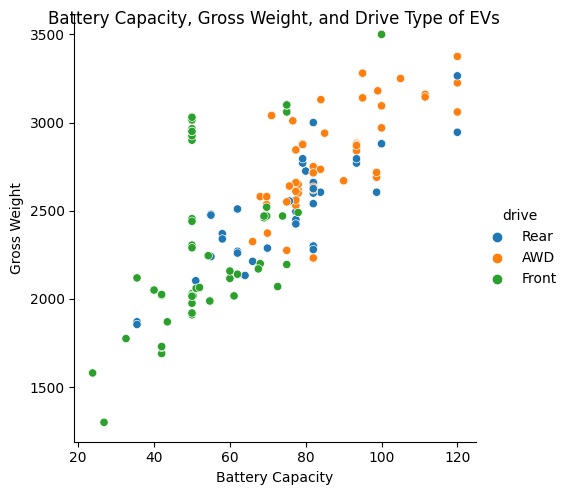

In [18]:
#! snip: Lab2

g = sns.relplot(
    data=df_ev,
    x="batterycapacity", y="grossweight", hue="drive",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Battery Capacity", "Gross Weight").fig.suptitle('Battery Capacity, Gross Weight, and Drive Type of EVs')

#! snip-end

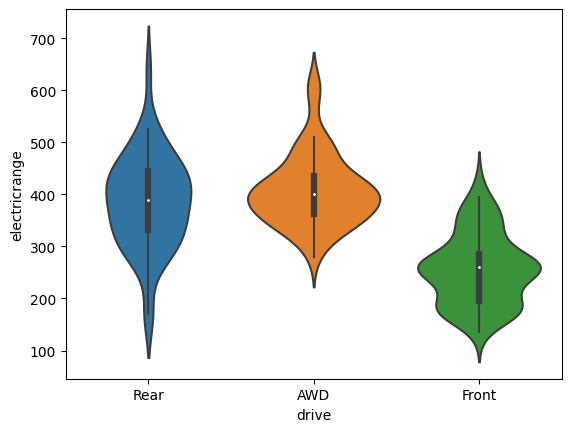

In [19]:
#! snip: Lab2

h = sns.violinplot(data=df_ev, x="drive", y="electricrange")

#! snip-end

#! snip: Lab2

My histograms show that my intuition about Top Speed was correct, that the feature is generally right skewed, but certainly more so for Rear and Front drives than for AWD. Not only does my scatterplot confirm the positive, linear relationship between Battery Capacity and Gross Weight, but that AWD vehicles tend to have larger values of each than Front drive vehicles, and that Rear drive vehicles are somewhere in between scattered about. My final chosen plot was a violin plot of Electric Range for the three drive types, which shows that Front drive vehicles tend to have lower Electric Range values than the other two, and that Rear drive vehicles have a larger standard deviation.

#! snip-end

## Part 2.3: Scaling Data (25 points)

In a few sentences (**in a markdown cell**), describe how the scale of the data may cause issues when we use it for any machine learning.  (**Hint:** see class notes on scale normalization).  Explicitly compute the variance of the raw `df_ev` dataset and refer to it in your explanation. (**Hint 2:** check out the [`pd.var()` documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html) to help you).

**THEN** scale the data and print out the `.head()` of the scaled data set to show it worked.

#! snip: Lab2

When we look at the variances (below) we see that some of the features (for example, Length and Gross Weight) have much larger variances than others (for example Acceleration), meaning that any sort of machine learning that relies on computing differences or comparing between these features will be biased in results without accounting for the different scales of the data.

#! snip-end

In [20]:
#! snip: Lab2

df_ev.var(numeric_only=True)

#! snip-end

acceleration           10.038666
topspeed             1452.388361
electricrange       10278.791865
totalpower          15114.115913
totaltorque         49382.359810
batterycapacity       404.922219
chargespeed           243.919369
length             143049.769483
width                4722.348486
height              23179.887319
wheelbase           56914.286977
grossweight        172716.918354
dtype: float64

In [21]:
#! snip: Lab2

# Scale normalization
df_ev_scaled = pd.DataFrame()

# Divide each numerical feature by the standard deviation:
for feat in df_ev.columns[1:]:
    df_ev_scaled[feat] = df_ev[feat] / df_ev[feat].std()

df_ev_scaled.head()

#! snip-end

,acceleration,topspeed,electricrange,totalpower,totaltorque,batterycapacity,chargespeed,length,width,height,wheelbase,grossweight
id,,,,,,,,,,,,
1647,2.461822,4.854342,3.846747,1.366526,1.575006,3.846406,3.137422,11.937522,27.503172,10.377708,12.155906,6.003481
1493,1.956833,4.198350,3.254939,1.748828,2.340008,3.463753,2.945335,12.384353,26.688263,11.172456,11.858296,6.208008
1229,1.009978,6.822318,4.093333,4.067042,3.825014,4.641529,2.945335,13.122020,28.609120,9.070642,12.155906,6.929869
1252,1.799024,4.985540,4.635823,2.033521,1.935007,4.169425,3.457567,12.646105,26.950198,9.510709,11.971472,6.268163
1534,2.493384,4.198350,4.438554,1.220113,1.395005,4.075004,3.521596,11.265953,26.324465,10.298889,11.615178,5.534271
